<center><h2>NEW YORK CITY TAXI TRIP DURATION</h2></center>
<center><h3>Exploratory Data Analysis & Feature Engineering</h3></center>


## 1. Importing and Optimizing the Data

In [1]:
# library import
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# load train data

df_train = pd.read_csv(r"/kaggle/input/d/ajeeth123/nyc-taxi-trip-duration/train.csv", infer_datetime_format=True, parse_dates=[2,3])

/tmp/ipykernel_20/501230222.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_train = pd.read_csv(r"/kaggle/input/d/ajeeth123/nyc-taxi-trip-duration/train.csv", infer_datetime_format=True, parse_dates=[2,3])


In [3]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB
None


In [4]:
# optimize dtypes

df_train.passenger_count = df_train.passenger_count.astype(np.uint8)
df_train.vendor_id = df_train.vendor_id.astype(np.uint8)
df_train.trip_duration = df_train.trip_duration.astype(np.uint32)
for c in [c for c in df_train.columns if c.endswith('tude')]:
    df_train.loc[:,c] = df_train[c].astype(np.float32)

print(f"\n Memory usage(optimized) : {df_train.memory_usage().sum()/2**20:.2f} Mb")


 Memory usage(optimized) : 97.38 Mb


In [5]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## 2. Check for N/A values, Outliers etc.

In [6]:
print(df_train.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [7]:
# check for duplicate ids

print(f"No. of Duplicate Trip IDs : {len(df_train) - len(df_train.drop_duplicates(subset = 'id'))}")

No. of Duplicate Trip IDs : 0


In [8]:
# Check latitude/ longitude bounds

print(f"latitude bounds:{min(df_train.pickup_latitude.min(), df_train.dropoff_latitude.min())} to {max(df_train.pickup_latitude.max(), df_train.dropoff_latitude.max())}")
print(f"latitude bounds:{min(df_train.pickup_longitude.min(), df_train.dropoff_longitude.min())} to {max(df_train.pickup_longitude.max(), df_train.dropoff_longitude.max())}")


latitude bounds:32.1811408996582 to 51.88108444213867
latitude bounds:-121.93334197998047 to -61.33552932739258


In [9]:
# Check trip duration

print(f"Trip duration in seconds: {df_train.trip_duration.min()} to {df_train.trip_duration.max()}")

Trip duration in seconds: 1 to 3526282


In [10]:
# Let's see if there are any incorrect trip duration

print(f"Incorrect trip duration : {(df_train.trip_duration != df_train.dropoff_datetime.sub(df_train.pickup_datetime, axis = 0)/ np.timedelta64(1, 's')).sum()}")

Incorrect trip duration : 0


In [11]:
# vendors count
print(f"Vendors count :{len(df_train.vendor_id.unique())}")

Vendors count :2


In [12]:
# date range

print(f"Date range : {df_train.pickup_datetime.dt.date.min()} to {df_train.dropoff_datetime.dt.date.max()}")

Date range : 2016-01-01 to 2016-07-01


In [13]:
# passengers count

print(f"Passengers: {df_train.passenger_count.min()} to {df_train.passenger_count.max()}")

Passengers: 0 to 9


## 3. Preprocessing and Cleaning

#### Since there are less than 10k rows with anomalies in trip_duration (in common sense) we can safely remove them

In [14]:
duration_mask = ((df_train.trip_duration < 60) | (df_train.trip_duration < 60))

In [15]:
print( f"Anomalies in trip duration : {(df_train[duration_mask].shape[0] / df_train.shape[0]) * 100:.2f}%")

Anomalies in trip duration : 0.59%


In [16]:
# let's see range now

print(f"Trip duration in seconds : {df_train.trip_duration.min()} to {df_train.trip_duration.max()}")

Trip duration in seconds : 1 to 3526282


In [17]:
print(f"Empty trips : {df_train[df_train.passenger_count == 0].shape[0]}")

Empty trips : 60


## 4. Visualization

### Pick-ups

In [18]:
# Let's add some additional columns to speed-up calculations
# dow names for plot mapping
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# mm names for plot mapping
mm_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [19]:
df_train['mm_pickup'] = df_train.pickup_datetime.dt.month.astype(np.uint8)
df_train['mm_dropoff'] = df_train.dropoff_datetime.dt.month.astype(np.uint8)
# day of week
df_train['dow_pickup'] = df_train.pickup_datetime.dt.weekday.astype(np.uint8)
df_train['dow_dropoff'] = df_train.dropoff_datetime.dt.weekday.astype(np.uint8)
# day hour
df_train['hh_pickup'] = df_train.pickup_datetime.dt.hour.astype(np.uint8)
df_train['hh_dropoff'] = df_train.dropoff_datetime.dt.hour.astype(np.uint8)

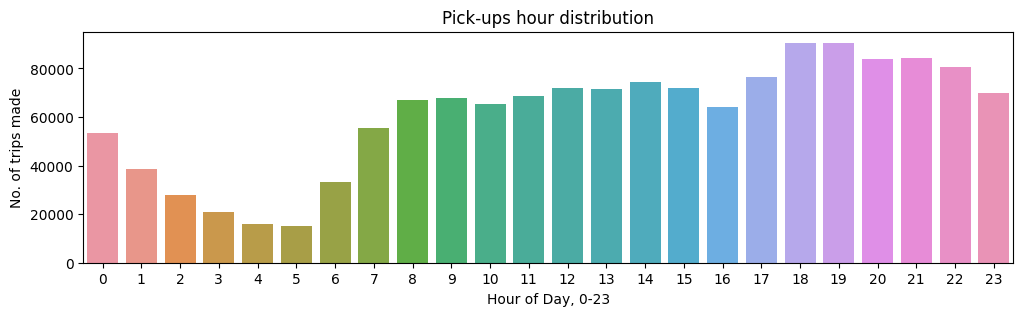

In [20]:
# pickup time distribution, hour-of-day

plt.figure(figsize = (12,3))

data = df_train.groupby('hh_pickup').aggregate({"id" : 'count'}).reset_index()
sns.barplot(x = 'hh_pickup', y = 'id', data = data)
plt.title("Pick-ups hour distribution")
plt.xlabel("Hour of Day, 0-23")
plt.ylabel("No. of trips made")
pass

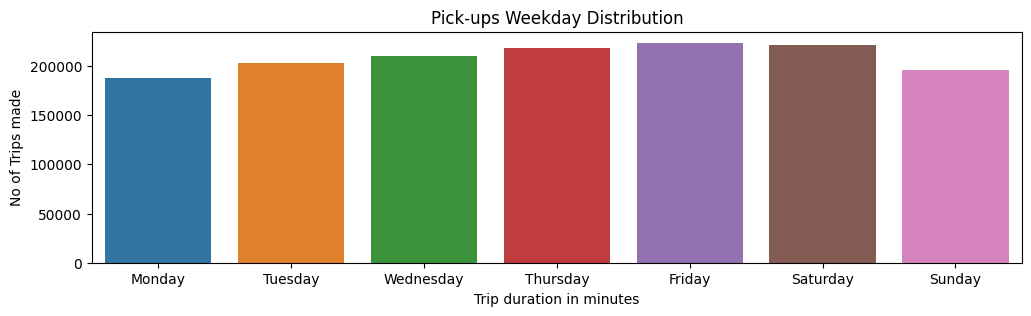

In [21]:
# pick-up distribution by weekday

plt.figure(figsize = (12,3))

data = df_train.groupby('dow_pickup').aggregate({'id':'count'}).reset_index()
sns.barplot(x = 'dow_pickup', y = 'id', data = data)

plt.title('Pick-ups Weekday Distribution')
plt.xlabel('Trip duration in minutes')
plt.xticks(range(0,7), dow_names, rotation = 'horizontal')
plt.ylabel('No of Trips made')
pass

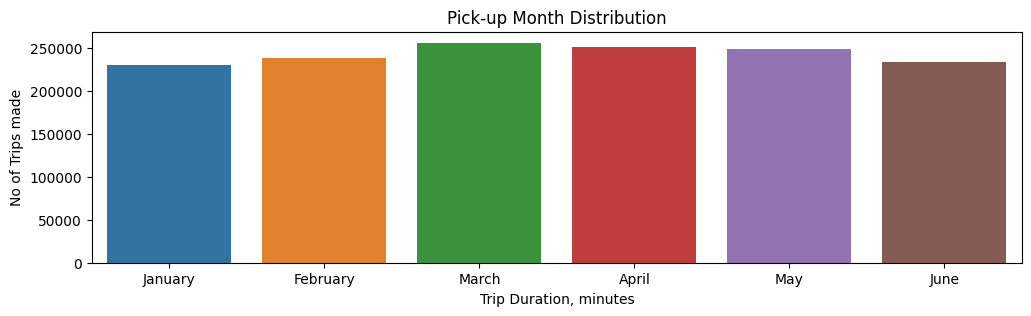

In [22]:
# pickup distribution, by months
plt.figure(figsize=(12,3))

data = df_train.groupby('mm_pickup').aggregate({'id':'count'}).reset_index()
sns.barplot(x='mm_pickup', y='id', data=data)

plt.title('Pick-up Month Distribution')
plt.xlabel('Trip Duration, minutes')
plt.xticks(range(0,6), mm_names[:6], rotation='horizontal')
plt.ylabel('No of Trips made')
pass

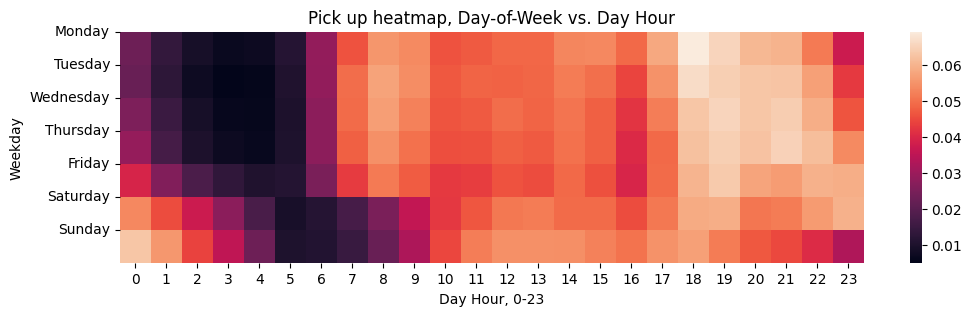

In [23]:
# pickup heatmap, dow vs hour

plt.figure(figsize = (12,3))
sns.heatmap(data = pd.crosstab(df_train.dow_pickup,
                               df_train.hh_pickup,
                               values = df_train.vendor_id,
                               aggfunc = 'count',
                               normalize = 'index'))
plt.title('Pick up heatmap, Day-of-Week vs. Day Hour')
plt.ylabel('Weekday')
plt.xlabel('Day Hour, 0-23')
plt.yticks(range(0,7), dow_names, rotation = 'horizontal')
pass

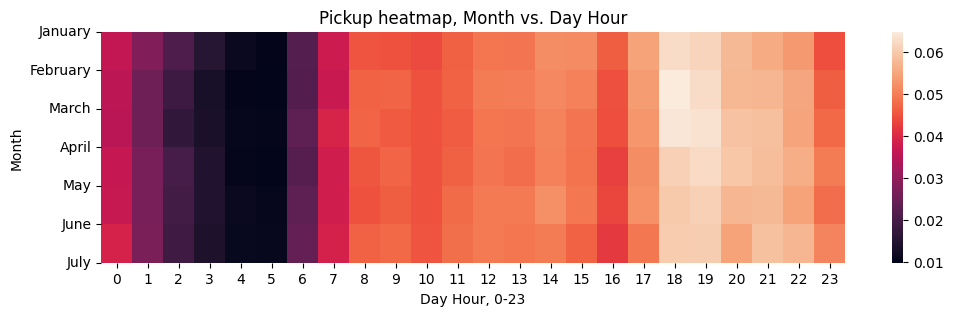

In [24]:
# Pickup heatmap, month vs hour
plt.figure(figsize=(12,3))
sns.heatmap(data=pd.crosstab(df_train.mm_pickup, 
                             df_train.hh_pickup, 
                             values=df_train.vendor_id, 
                             aggfunc='count',
                             normalize='index'))

plt.title('Pickup heatmap, Month vs. Day Hour')
plt.ylabel('Month') ; plt.xlabel('Day Hour, 0-23')
plt.yticks(range(0,7), mm_names[:7], rotation='horizontal')
pass

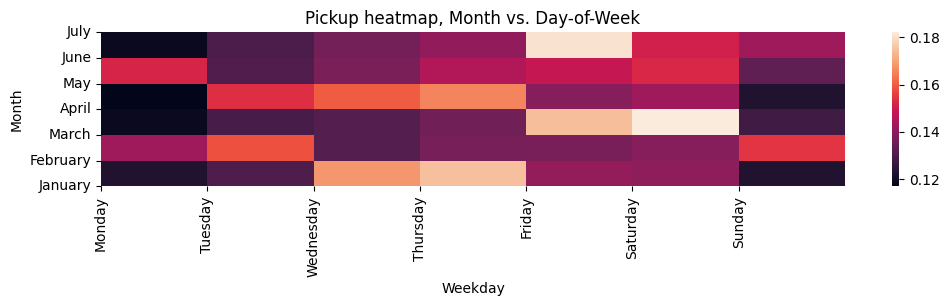

In [25]:
# Pickup heatmap, month vs dow
plt.figure(figsize=(12,2))
sns.heatmap(data=pd.crosstab(df_train.mm_pickup, 
                             df_train.dow_pickup, 
                             values=df_train.vendor_id, 
                             aggfunc='count',
                             normalize='index'))

plt.title('Pickup heatmap, Month vs. Day-of-Week')
plt.ylabel('Month') ; plt.xlabel('Weekday')
plt.xticks(range(0,7), dow_names, rotation='vertical')
plt.yticks(range(0,7), mm_names[:7][::-1], rotation='horizontal')
pass

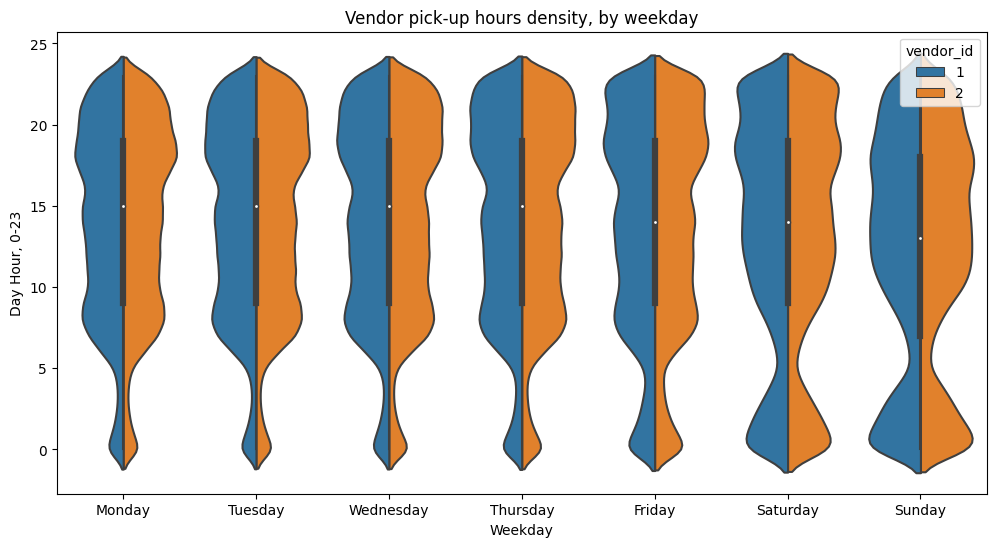

In [26]:
# vendor pick-up hours density by weekdays
plt.figure(figsize=(12,6))
sns.violinplot(x=df_train.dow_pickup, 
               y=df_train.hh_pickup, 
               hue=df_train.vendor_id, 
               split=True)

plt.title('Vendor pick-up hours density, by weekday')
plt.xlabel('Weekday') ; plt.ylabel('Day Hour, 0-23')
plt.xticks(range(0,7), dow_names, rotation='horizontal')
pass

### Trip Duration

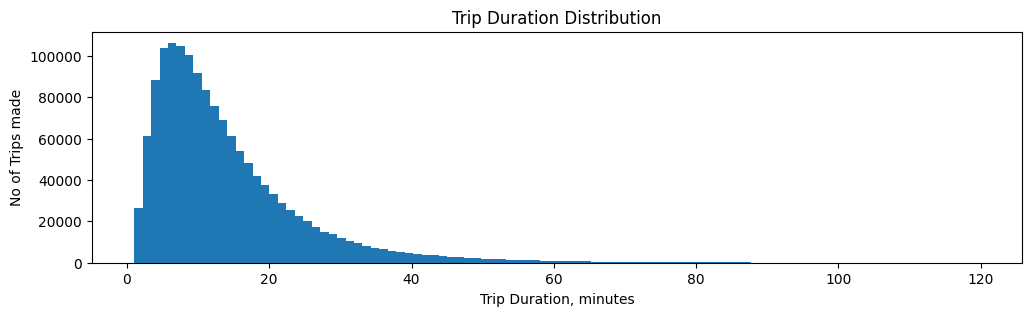

In [27]:
# trip duration distribution, minutes
plt.figure(figsize=(12,3))
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration, minutes')
plt.ylabel('No of Trips made')
filtered_duration = df_train[(df_train.trip_duration/60 > 1) & (df_train.trip_duration/60 < 120)].trip_duration/60
plt.hist(filtered_duration, bins=100)
plt.show()

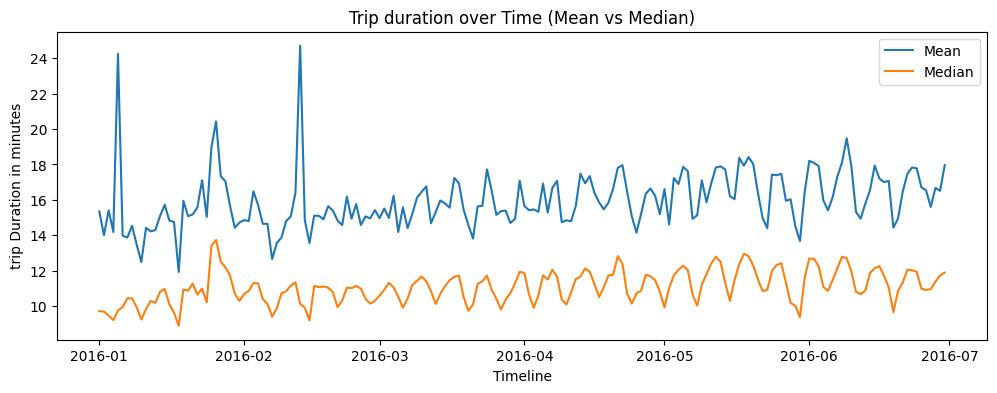

In [28]:
#trip duration time-series by day, mean vs median

data = df_train.groupby(df_train.pickup_datetime.dt.date).aggregate({'trip_duration':['mean', 'median']})/60
plt.figure(figsize = (12,4))
plt.title("Trip duration over Time (Mean vs Median)")
plt.ylabel("trip Duration in minutes")
plt.xlabel("Timeline")
plt.plot(data)
plt.legend(['Mean', 'Median'])
pass

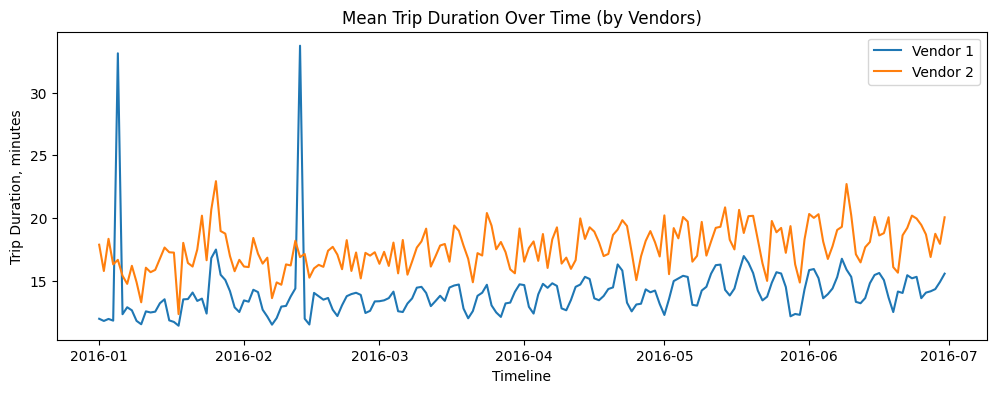

In [29]:
# trip duration over time, vendors comparison
# seems like they are almost equal
data = pd.crosstab(index=df_train.pickup_datetime.dt.date, 
                   columns=df_train.vendor_id, 
                   values=df_train.trip_duration/60, 
                   aggfunc='mean')
plt.figure(figsize=(12,4))
plt.title('Mean Trip Duration Over Time (by Vendors)')
plt.ylabel('Trip Duration, minutes') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Vendor 1', 'Vendor 2'])
pass

### 